In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


[Text(0, 0.5, 'Classification'),
 Text(0.5, 0, 'Number of Postings'),
 Text(0.5, 1.0, 'Jobs and Number of Postings')]

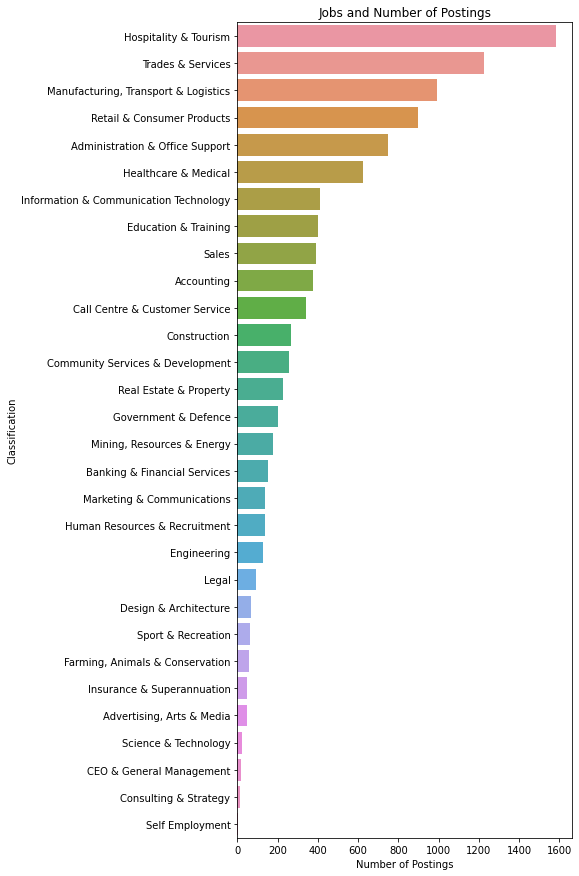

In [2]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (6,15))

ax = sns.barplot(x= df.Classification.value_counts().sort_values(ascending = False), y = df.Classification.value_counts().index, data = df)

ax.set(ylabel = 'Classification', xlabel = 'Number of Postings', title = 'Jobs and Number of Postings')



In [3]:
#create dataframe for salary ranges
salarygrps = df.groupby(['LowestSalary']).count()

salarygrps

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType
LowestSalary,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821


Text(0.5, 1.0, 'Job Posts by Salary Range')

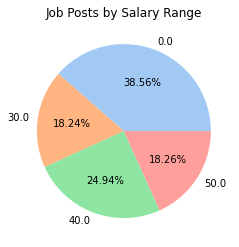

In [4]:
#Salary ranges plot
colours = sns.color_palette('pastel')[0:5]

plt.pie(salarygrps.Id, labels = salarygrps.index, colors=colours, autopct='%1.2f%%')
plt.title('Job Posts by Salary Range')

In [5]:
locationDf = df[df['Location'].isna()==False]

#Map cities to other 
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
locationDf.loc[~locationDf['Location'].isin(cities), 'Location'] = "Other"

locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Brisbane,1119,1119,1056,1119,987,1119,1119,1119,1086,1119,1119,1086,Brisbane,1119
Melbourne,2481,2481,2338,2481,2290,2481,2481,2481,2406,2481,2481,2407,Melbourne,2481
Other,2648,2648,2432,2648,0,2648,2648,2648,2592,2648,2648,2595,Other,2648
Perth,677,677,654,677,563,677,677,677,652,677,677,655,Perth,677


Text(0.5, 1.0, 'Market Share of Locations')

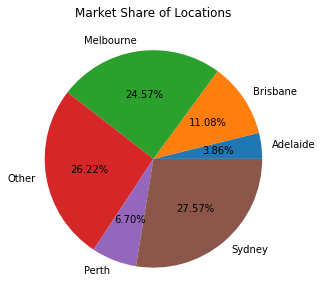

In [6]:
#Job market share of city 

# Pie char for job market share of cities
fig= plt.subplots(figsize = (5,5))

plt.pie(locationDf.Id, labels = locationDf.Location, autopct='%1.2f%%')
plt.title('Market Share of Locations')

Text(50.0, 0.5, '')

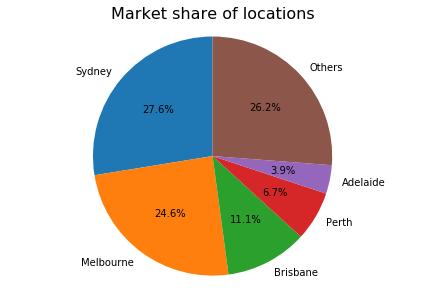

In [14]:
%matplotlib inline

from matplotlib import cm

